# Future Sales Prediction:
-  Accurate sales forecasts enable shops to make informed business decisions and predict short-term and long-term performance.<br>It is easier for established shops to predict future sales based on years of past business data.<br><br>

- Problem Statement: We are provided with daily historical sales data. The task is to forecast the total income of every shop for the <br>test set. The list of shops and products slightly changes every month. Creating a robust model that can handle such situations. 

### About Dataset:

#### File descriptions:
- sales_train.csv - the training set. Daily historical data from January 2013 to October 2015.
- test.csv - the test set. You need to forecast the sales for these shops and products for November 2015.
- sample_submission.csv - a sample submission file in the correct format.
- items.csv - supplemental information about the items/products.
- item_categories.csv  - supplemental information about the items categories.
- shops.csv- supplemental information about the shops.

#### Data fields
- ID - an Id that represents a (Shop, Item) tuple within the test set
- shop_id - unique identifier of a shop
- item_id - unique identifier of a product
- item_category_id - unique identifier of item category
- item_cnt_day - number of products sold. You are predicting a monthly amount of this measure
- item_price - current price of an item
- date - date in format dd/mm/yyyy
- date_block_num - a consecutive month number, used for convenience. January 2013 is 0, February 2013 is 1,..., October 2015 is 33
- item_name - name of item
- shop_name - name of shop
- item_category_name - name of item category

#### Here is the link of the dataset: [ https://www.kaggle.com/c/competitive-data-science-predict-future-sales/data ]

In [2]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [3]:
import numpy as np
import tensorflow as tf
from tensorflow.python import keras

C:\Users\Sneha Vijayakumar\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


###### Importing tensorflow and keras helps in predicting the sales using neural networks.

# Data Description

#### This dataset has 10 attributes and the attributes are distributed among 4 folders with different number of datapoints in each folder.
#### The folders are supposed to be sorted based on the data in each folder and based on what is supposed to matched next so that <br><br>the common attributes in folders are not disturbed.

# <b>Data preprocessing:</b> 

# Reading the data from folder 1

In [15]:
data1=pd.read_csv("sales_train_v2.csv")
data1.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,02.01.2013,0,59,22154,999.00,1.0
1,03.01.2013,0,25,2552,899.00,1.0
2,05.01.2013,0,25,2552,899.00,-1.0
3,06.01.2013,0,25,2554,1709.05,1.0
4,15.01.2013,0,25,2555,1099.00,1.0


# Checking if there is any missing values

In [7]:
print(data1.isnull().any())


date              False
date_block_num    False
shop_id           False
item_id           False
item_price        False
item_cnt_day      False
dtype: bool


In [8]:
len(data1)

2935849

#### <ul><li>Data1 is the data in the first folder with <u>6</u> attributes and <u>2935849</u> datapoints of which none of them have missing values.</ul></li>

# Reading the data from folder 2

In [10]:
data2=pd.read_csv("salepridict/items.csv")
name=[]
cid=[]
item_idd=np.array(data2)
for i in data1["item_id"]:
    if i in range(len(item_idd)):
        name.append(item_idd[i][0])
        cid.append(item_idd[i][2])
item_name=pd.DataFrame(name, columns=["item_name"])
cat_no=pd.DataFrame(cid,columns=["item_cat_no"])
data=pd.concat([data1,item_name,cat_no], axis=1)


In [11]:
data2.head()

,item_name,item_id,item_category_id
0,! ВО ВЛАСТИ НАВАЖДЕНИЯ (ПЛАСТ.) D,0,40
1,!ABBYY FineReader 12 Professional Edition Full...,1,76
2,***В ЛУЧАХ СЛАВЫ (UNV) D,2,40
3,***ГОЛУБАЯ ВОЛНА (Univ) D,3,40
4,***КОРОБКА (СТЕКЛО) D,4,40


In [12]:
print(data2.isnull().any())

item_name           False
item_id             False
item_category_id    False
dtype: bool


In [9]:
len(data2)

22170

<ul><li><b>This folder is choosen as "item_id" is the common attribute to be matched and also has "item_cat_no" which is used to match data in next folder.</b></li></ul>
<ul><li><b>The data2 is the data in the second folder with <u>3</u> attributes and <u>22170</u> datapoints.</b></li></ul>
<ul><li><b>The common attribute in the first and second folder is "item_id".</b></li></ul>
<ul><li><b>There are <u>22170</u> "item_id" but the total data is <u>2935849</u> which contains data of 2013,2014,and till october 2015 of different shops. So, the "item_ids" of data2 is matched with the "item_id" of data.</b></li></ul>

In [10]:
data.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,item_name,item_cat_no
0,02.01.2013,0,59,22154,999.00,1.0,ЯВЛЕНИЕ 2012 (BD),37
1,03.01.2013,0,25,2552,899.00,1.0,DEEP PURPLE The House Of Blue Light LP,58
2,05.01.2013,0,25,2552,899.00,-1.0,DEEP PURPLE The House Of Blue Light LP,58
3,06.01.2013,0,25,2554,1709.05,1.0,DEEP PURPLE Who Do You Think We Are LP,58
4,15.01.2013,0,25,2555,1099.00,1.0,DEEP PURPLE 30 Very Best Of 2CD (Фирм.),56


##### So, this the data obtained after combining data2 and data which is done comparing the item_ids in both the data

# Reading the data from folder 3

In [12]:
data3=pd.read_csv("salepridict/item_categories.csv")
data33=np.array(data3)
cat=[]
for i in data["item_cat_no"]:
    if i in range(len(data33)):
        cat.append(data33[i][0])
catname=pd.DataFrame(cat, columns=["item_category_name"])
data=pd.concat([data,catname],axis=1)

In [13]:
data3.head()

,item_category_name,item_category_id
0,PC - Гарнитуры/Наушники,0
1,Аксессуары - PS2,1
2,Аксессуары - PS3,2
3,Аксессуары - PS4,3
4,Аксессуары - PSP,4


In [14]:
len(data3)

84

<ul><li><b>Data3 is the data in third folder and contains <u>84</u> datapoints which represents different item categories. The common attribute between data and data3 is "item_category_id".</b></li></ul>
<ul><b><li>So, the "item_cat_no" of data3 is matched with the corresponding "item_cat_no" of data.</li></b></ul> 

In [245]:
data.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,item_name,item_cat_no,item_category_name,item_category_name
0,02.01.2013,0,59,22154,999.00,1.0,ЯВЛЕНИЕ 2012 (BD),37,Кино - Blu-Ray,Кино - Blu-Ray
1,03.01.2013,0,25,2552,899.00,1.0,DEEP PURPLE The House Of Blue Light LP,58,Музыка - Винил,Музыка - Винил
2,05.01.2013,0,25,2552,899.00,-1.0,DEEP PURPLE The House Of Blue Light LP,58,Музыка - Винил,Музыка - Винил
3,06.01.2013,0,25,2554,1709.05,1.0,DEEP PURPLE Who Do You Think We Are LP,58,Музыка - Винил,Музыка - Винил
4,15.01.2013,0,25,2555,1099.00,1.0,DEEP PURPLE 30 Very Best Of 2CD (Фирм.),56,Музыка - CD фирменного производства,Музыка - CD фирменного производства


##### So, this the data obtained after combining data3 and data which is done comparing the item_cat_no in both the data

# Reading the data from folder 4

In [16]:
data4=pd.read_csv("salepridict/shops.csv")
d4=np.array(data4)
c=[]
for i in data["shop_id"]:
    if i in range(len(d4)):
        c.append(d4[i][0])
shop_name=pd.DataFrame(c, columns=["shop_name"])
data=pd.concat([data,shop_name],axis=1)

In [19]:
data4.head()

,shop_name,shop_id
0,"!Якутск Орджоникидзе, 56 фран",0
1,"!Якутск ТЦ ""Центральный"" фран",1
2,"Адыгея ТЦ ""Мега""",2
3,"Балашиха ТРК ""Октябрь-Киномир""",3
4,"Волжский ТЦ ""Волга Молл""",4


In [18]:
len(data4)

60

#### <ul><li><b>Data4 is the data in fourth folder and contains 60 datapoints which represents 60 different shops.</b></li> <br><li><b>The common attribute between data and data4 is shop_id.</b></li> <br><li><b>So, the shop_id of data4 is matched with corresponding shop_ids of data.</b></li>

In [20]:
data.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,item_name,item_cat_no,item_category_name,shop_name
0,02.01.2013,0,59,22154,999.00,1.0,ЯВЛЕНИЕ 2012 (BD),37,Кино - Blu-Ray,"Ярославль ТЦ ""Альтаир"""
1,03.01.2013,0,25,2552,899.00,1.0,DEEP PURPLE The House Of Blue Light LP,58,Музыка - Винил,"Москва ТРК ""Атриум"""
2,05.01.2013,0,25,2552,899.00,-1.0,DEEP PURPLE The House Of Blue Light LP,58,Музыка - Винил,"Москва ТРК ""Атриум"""
3,06.01.2013,0,25,2554,1709.05,1.0,DEEP PURPLE Who Do You Think We Are LP,58,Музыка - Винил,"Москва ТРК ""Атриум"""
4,15.01.2013,0,25,2555,1099.00,1.0,DEEP PURPLE 30 Very Best Of 2CD (Фирм.),56,Музыка - CD фирменного производства,"Москва ТРК ""Атриум"""


##### So, this the data obtained after combining data4 and data which is done comparing the shop_id in both the data

# -------------------------------------------------------------------------------------------------------

# Insights From Data:

In [21]:
data = data.drop(['shop_name', 'item_name', 'item_category_name'],axis=1)

#### <u>shop_name, item_name, item_category_name</u> are String values and are not required as we have the respective ids of it.<br><br> So, these attributes are dropped.

In [22]:
data.head(10)

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,item_cat_no
0,02.01.2013,0,59,22154,999.00,1.0,37
1,03.01.2013,0,25,2552,899.00,1.0,58
2,05.01.2013,0,25,2552,899.00,-1.0,58
3,06.01.2013,0,25,2554,1709.05,1.0,58
4,15.01.2013,0,25,2555,1099.00,1.0,56
5,10.01.2013,0,25,2564,349.00,1.0,59
6,02.01.2013,0,25,2565,549.00,1.0,56
7,04.01.2013,0,25,2572,239.00,1.0,55
8,11.01.2013,0,25,2572,299.00,1.0,55
9,03.01.2013,0,25,2573,299.00,3.0,55


##### This is the data obtained after dropping the non-required attributes.

In [23]:
from datetime import datetime

In [24]:
data['date'] = [datetime.strptime(i, "%d.%m.%Y") for i in data['date']]

In [25]:
data['day'] = [i.day for i in data['date']]
data['month'] = [i.month for i in data['date']]
data['year'] = [i.year for i in data['date']]

#### <ul><li>The date attribute contains day, month and year as a whole in string form.</li> <br><br><li> The date is stripped so as to obtained those values seperately as a new attributes.</li>

In [26]:
data.head(10)

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,item_cat_no,day,month,year
0,2013-01-02,0,59,22154,999.00,1.0,37,2,1,2013
1,2013-01-03,0,25,2552,899.00,1.0,58,3,1,2013
2,2013-01-05,0,25,2552,899.00,-1.0,58,5,1,2013
3,2013-01-06,0,25,2554,1709.05,1.0,58,6,1,2013
4,2013-01-15,0,25,2555,1099.00,1.0,56,15,1,2013
5,2013-01-10,0,25,2564,349.00,1.0,59,10,1,2013
6,2013-01-02,0,25,2565,549.00,1.0,56,2,1,2013
7,2013-01-04,0,25,2572,239.00,1.0,55,4,1,2013
8,2013-01-11,0,25,2572,299.00,1.0,55,11,1,2013
9,2013-01-03,0,25,2573,299.00,3.0,55,3,1,2013


In [27]:
data = data.drop(['date'],axis=1)
data = data.drop(['date_block_num'],axis=1)
data = data.drop(['day'],axis=1)
data = data.drop(['item_cat_no'],axis=1)

## Dropping the unnecessary features
<ul><li><b>"Date" is stripped and corresponding day, month, year is obtained as new attribute a hence, " date " is not required anymore So, it is dropped.</b></li>
<br><li><b>"date_block_num" contains the month information of 3 years, which is now obtained as " month " and " year " after stripping date.So, it is dropped.</b></li>
<br><li><b>"Day" is not of our concern as there would be many items sold for that day and we are predicting the sales for that month of year. So, day is dropped.</b></li>
<br><li><b>"Item_cat_no" is again not required here as we are predicting sales of the shop for that month irrespective of the item category.
So, "item_cat_no" is dropped.</b></li></ul>

In [28]:
data.head()

,shop_id,item_id,item_price,item_cnt_day,month,year
0,59,22154,999.00,1.0,1,2013
1,25,2552,899.00,1.0,1,2013
2,25,2552,899.00,-1.0,1,2013
3,25,2554,1709.05,1.0,1,2013
4,25,2555,1099.00,1.0,1,2013


##### So, this is the data obtained after dropping the attributes that are unimportant.

# Seperation of Data based on year

In [29]:
data2013 = data[data.year==2013]
data2014 = data[data.year==2014]
data2015 = data[data.year==2015]

##### The data of 3 years are seperated to make the computation simple and clear.

# Function to calculate item count for each month

For each month of an year the count of each item sold in that month is calculated and hence, item quantity is the new attribute <br>generated after the calculation. 

In [30]:
def preprocess(year, dataframe):
    mydict = {}
    
    for i, row in dataframe.iterrows():
        mn = int(row['month'])
        itemid = int(row['item_id'])
        if mn not in mydict.keys():
            mydict[mn] = {}

        if itemid not in mydict[mn].keys():
            mydict[mn][itemid] = [row['shop_id'], row['item_price'],0]

        mydict[mn][itemid][-1] += row['item_cnt_day']
        
    df =[]

    for mn in mydict.keys():
        for itemid in mydict[mn].keys():
            row = [year, mn,itemid] + mydict[mn][itemid]
            df.append(row)

    a = pd.DataFrame(df,columns=['year', 'month', 'item_id', 'shop_id', 'item_price', 'item_quantity'])
    
    return a
    

## Calculation of item_quantity for all 3 years

In [32]:
ndata2013 = preprocess(2013, data2013)
ndata2014 = preprocess(2014, data2014)
ndata2015 = preprocess(2015, data2015)

##### The splitting of data is hence useful in order to avoid checking on another constraint i.e, "year". It also avoids confusion. 

In [33]:
ndata2013.head()

,year,month,item_id,shop_id,item_price,item_quantity
0,2013,1,22154,59.0,999.00,18.0
1,2013,1,2552,25.0,899.00,0.0
2,2013,1,2554,25.0,1709.05,1.0
3,2013,1,2555,25.0,1099.00,2.0
4,2013,1,2564,25.0,349.00,5.0


##### The above is the sample dataframe of 2013.

# Function To Calculate Income Earned By Each Shop In A Month

For each month of an year income i.e, month_price earned by each shop is caluculated by multiplying item_quantity with item_price for each item <br><br>sold in that month from that shop. So, month_price is the target we are preparing the model to predict.

In [34]:
def pricecount(year,frame):
    dict_year={}
    for i,j in frame.iterrows():
        mn= j["month"]
        shopid = j["shop_id"]
        if mn not in dict_year.keys():
            dict_year[mn]={}
        if shopid not in dict_year[mn].keys():
            dict_year[mn][shopid] = [year,0]
        dict_year[mn][shopid][-1] += j["item_quantity"]*j["item_price"]
    df =[]

    for mn in dict_year.keys():
        for shopid in dict_year[mn].keys():
            row = [mn,shopid] + dict_year[mn][shopid]
            df.append(row)
    finaldata_year = pd.DataFrame(df,columns=['month','shop_id',"year",'month_price'])    
    return finaldata_year

## Calculation of month_price for all 3 years

In [35]:
pdata2013 = pricecount(2013,ndata2013)
pdata2014 = pricecount(2014,ndata2014)
pdata2015 = pricecount(2015,ndata2015)

In [37]:
pdata2013.head()

,month,shop_id,year,month_price
0,1.0,59.0,2013,31872.00
1,1.0,25.0,2013,55011322.62
2,1.0,24.0,2013,22762413.70
3,1.0,23.0,2013,1712609.08
4,1.0,19.0,2013,4326429.41


##### The above is the sample dataframe of 2013.

### Concatenating The Data 

In [39]:
finaldata = pd.concat([pdata2013, pdata2014, pdata2015])

In [40]:
finaldata.head()

,month,shop_id,year,month_price
0,1.0,59.0,2013,31872.00
1,1.0,25.0,2013,55011322.62
2,1.0,24.0,2013,22762413.70
3,1.0,23.0,2013,1712609.08
4,1.0,19.0,2013,4326429.41


###### So, by concatenating the data of all 3 years which is obtained after all the necessary modifications and computations, <br><br>we get the above finaldata

In [41]:
finaldata=finaldata.reset_index()
finaldata=finaldata.drop("index",axis=1)

###### After concatination the index of the data is jumbled hence the index is resetted which adds up another index column which are the old <br><br>indices of the data. Hence, the index column is also dropped.

# ------------------------------------------------------------------------------------------------------

# Graph Plots

#### The bar graph is plotted for Shop_id vs month_price. This graph shows which shop has more sales during that month. 

In [42]:
pdata2013["month"].value_counts()

12.0    46
10.0    46
7.0     46
6.0     46
3.0     46
2.0     46
11.0    45
9.0     45
8.0     45
5.0     45
4.0     45
1.0     45
Name: month, dtype: int64

In [43]:
y=pdata2013.sort_values("month").iloc[0:45,:]
y.head()

,month,shop_id,year,month_price
0,1.0,59.0,2013,31872.0
25,1.0,12.0,2013,264098.6
26,1.0,31.0,2013,180023.0
27,1.0,30.0,2013,60702.2
28,1.0,32.0,2013,29454.0


Text(0.5,1,'Each shop sale for January 2013')

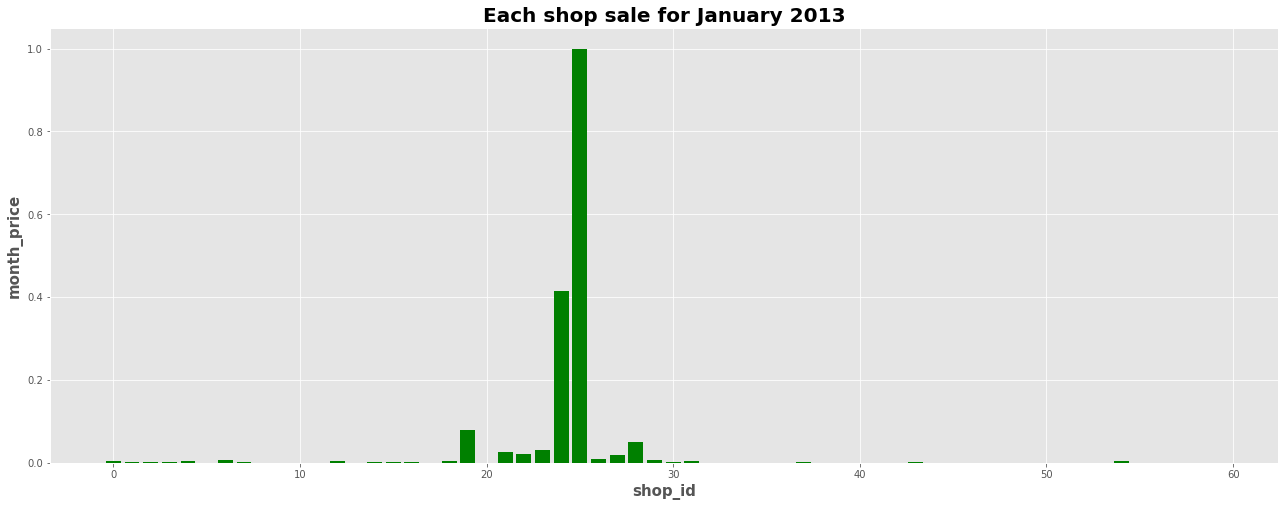

In [44]:
plt.style.use('ggplot')

x = list(y["shop_id"])
y = list((y["month_price"])/y["month_price"].max())

from matplotlib.pyplot import figure
fig, ax = plt.subplots(figsize=(22,8))
barWidth = 0.25
ax.bar(x , y, color='green')
plt.xlabel('shop_id', fontweight='bold', fontsize=15)
plt.ylabel("month_price", fontweight='bold',fontsize=15)
plt.title("Each shop sale for January 2013",fontweight='bold',fontsize=20)



In [45]:
pdata2015["month"].value_counts()

1.0     50
2.0     47
4.0     46
3.0     46
10.0    44
5.0     44
7.0     43
6.0     43
9.0     42
8.0     42
Name: month, dtype: int64

In [46]:
mon2015=pdata2015.sort_values("month").iloc[0:50,:]
mon2015.head()

,month,shop_id,year,month_price
0,1.0,27.0,2015,19318538.51
27,1.0,43.0,2015,53100.60
28,1.0,42.0,2015,146921.50
29,1.0,47.0,2015,53062.34
30,1.0,31.0,2015,270089.80


Text(0.5,1,'Each shop sale for January 2015')

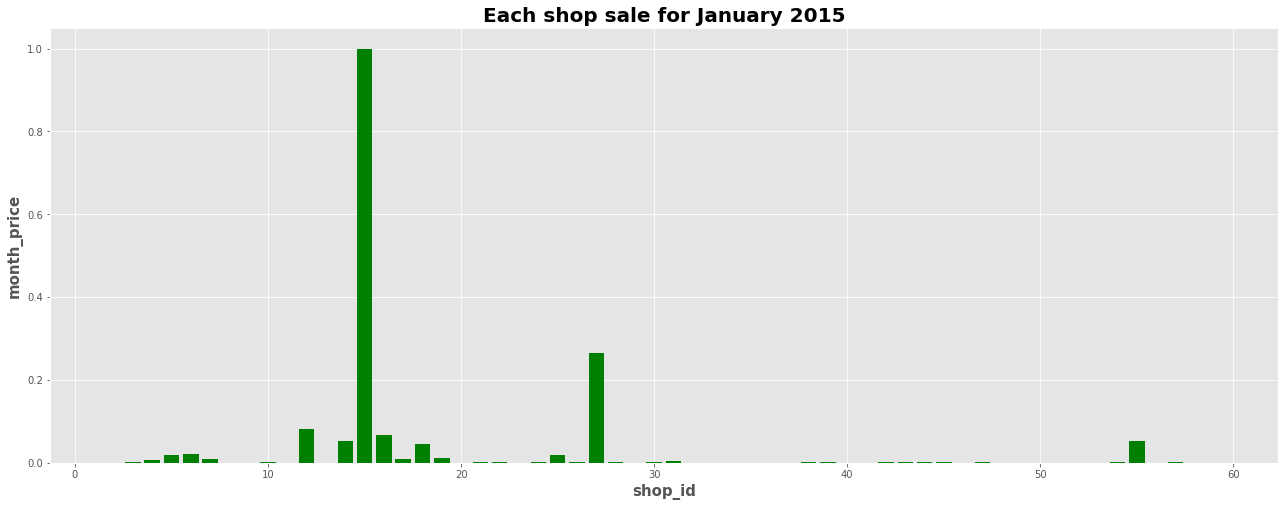

In [47]:

plt.style.use('ggplot')

x = list(mon2015["shop_id"])
y = list((mon2015["month_price"])/mon2015["month_price"].max())

from matplotlib.pyplot import figure
fig, ax = plt.subplots(figsize=(22,8))
barWidth = 0.25
ax.bar(x , y, color='green')
plt.xlabel('shop_id', fontweight='bold', fontsize=15)
plt.ylabel("month_price", fontweight='bold',fontsize=15)
plt.title("Each shop sale for January 2015",fontweight='bold',fontsize=20)

In [48]:
pdata2014["month"].value_counts()

10.0    52
8.0     51
12.0    50
11.0    50
9.0     50
7.0     49
6.0     48
5.0     48
4.0     48
3.0     47
2.0     46
1.0     46
Name: month, dtype: int64

In [49]:
mon2014=pdata2014.sort_values("month").iloc[0:46,:]
mon2014.head()

,month,shop_id,year,month_price
0,1.0,54.0,2014,5.791100e+07
25,1.0,45.0,2014,1.784800e+04
26,1.0,14.0,2014,7.949000e+03
27,1.0,15.0,2014,3.322700e+04
28,1.0,12.0,2014,3.837269e+05


Text(0.5,1,'Each shop sale for January 2014')

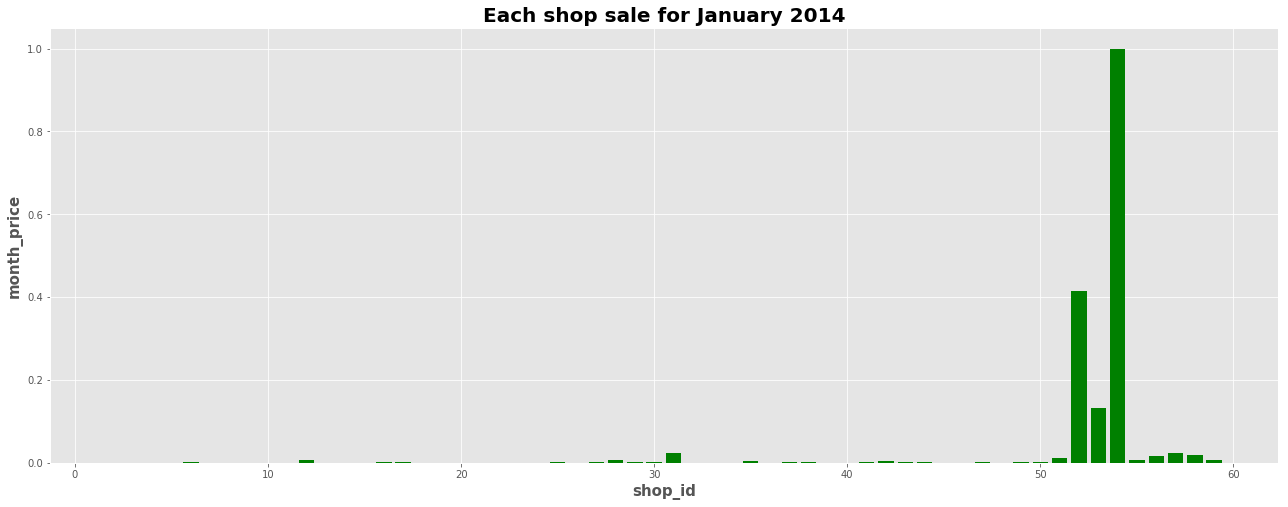

In [50]:
plt.style.use('ggplot')

x = list(mon2014["shop_id"])
y = list((mon2014["month_price"])/mon2014["month_price"].max())

from matplotlib.pyplot import figure
fig, ax = plt.subplots(figsize=(22,8))
barWidth = 0.25
ax.bar(x , y, color='green')
plt.xlabel('shop_id', fontweight='bold', fontsize=15)
plt.ylabel("month_price", fontweight='bold',fontsize=15)
plt.title("Each shop sale for January 2014",fontweight='bold',fontsize=20)

# ---------------------------------------------------------------------------------------------------------

In [51]:
finaldata.to_csv('processed_sales.csv')


# Encoding Data 

#### Shop_id, month, year are categorical values and hence get_dummies creates a new dataframe which consists of zeros and ones <br><br>based on the values in the data. For example if the year is 2015, only that column gets 1 and rest gets 0.

In [52]:
shopdummies=pd.get_dummies(finaldata["shop_id"])
monthdummies=pd.get_dummies(finaldata["month"])
yeardummies=pd.get_dummies(finaldata["year"])

In [53]:
yeardummies.head()

,2013,2014,2015
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0


###### After getting the dummies month, year, shop_id is dropped and the dummies are concatenated with the finaldata

In [55]:
finaldata=pd.concat([finaldata,shopdummies,monthdummies,yeardummies],axis=1)

In [56]:
finaldata=finaldata.drop(["month","year","shop_id"],axis=1)

In [57]:
finaldata.head(10)

,month_price,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,...,6.0,7.0,8.0,9.0,10.0,11.0,12.0,2013,2014,2015
0,31872.00,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,55011322.62,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,22762413.70,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,1712609.08,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,4326429.41,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
5,1162013.50,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
6,181086.62,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
7,1487927.10,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
8,2824582.03,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
9,1030170.26,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


#### Hence, these are the attributes required to train the model.

# Model Selection and Training


In [58]:
y = np.array(finaldata["month_price"])
X = np.array(finaldata.drop(['month_price'], axis=1))

y = y / y.max()

##### X is the training data. y is the value that is predicted using X. <br><br>Here Y is normalized to scale the values between 0 and 1.

# PCA

##### <ul><li>Principal Component Analysis (PCA) is used to explain the variance-covariance structure of a set of variables through linear combinations. It <br><br>is often used as a dimensionality-reduction technique.</li></ul>

In [60]:
from sklearn.decomposition import PCA
pca = PCA(n_components=38)
x = pca.fit_transform(X) 

In [61]:
x.shape

(1578, 38)

##### There are 76 columns and most of the values are 0 and 1. So, in order to not confuse the neural network with 0s and 1s, the dimensionality <br><br>reduction is done using PCA. So, 76 columns are reduced to 38 columns. 

In [62]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.3)

# Training the model

In [63]:
model = keras.models.Sequential([
    keras.layers.Dense(43,input_shape=(xtrain[0].shape), activation=tf.nn.relu,  kernel_regularizer=keras.regularizers.l2(0.001)),
    keras.layers.Dense(23,activation=tf.nn.relu,  kernel_regularizer=keras.regularizers.l2(0.001)),
    keras.layers.Dense(1)
])

In [64]:
model.compile(loss='mse',
             optimizer=keras.optimizers.Adam(0.001),
             metrics=['mae'])

In [65]:
history = model.fit(xtrain,ytrain, epochs=50, verbose=2)

Epoch 1/50
 - 0s - loss: 0.0849 - mean_absolute_error: 0.0931
Epoch 2/50
 - 0s - loss: 0.0681 - mean_absolute_error: 0.0562
Epoch 3/50
 - 0s - loss: 0.0582 - mean_absolute_error: 0.0447
Epoch 4/50
 - 0s - loss: 0.0502 - mean_absolute_error: 0.0402
Epoch 5/50
 - 0s - loss: 0.0434 - mean_absolute_error: 0.0384
Epoch 6/50
 - 0s - loss: 0.0376 - mean_absolute_error: 0.0366
Epoch 7/50
 - 0s - loss: 0.0327 - mean_absolute_error: 0.0343
Epoch 8/50
 - 0s - loss: 0.0287 - mean_absolute_error: 0.0332
Epoch 9/50
 - 0s - loss: 0.0254 - mean_absolute_error: 0.0330
Epoch 10/50
 - 0s - loss: 0.0226 - mean_absolute_error: 0.0364
Epoch 11/50
 - 0s - loss: 0.0202 - mean_absolute_error: 0.0323
Epoch 12/50
 - 0s - loss: 0.0183 - mean_absolute_error: 0.0325
Epoch 13/50
 - 0s - loss: 0.0167 - mean_absolute_error: 0.0330
Epoch 14/50
 - 0s - loss: 0.0155 - mean_absolute_error: 0.0313
Epoch 15/50
 - 0s - loss: 0.0144 - mean_absolute_error: 0.0331
Epoch 16/50
 - 0s - loss: 0.0134 - mean_absolute_error: 0.0332
E

### Plotting The Loss Curve

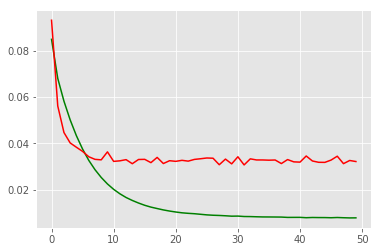

In [66]:
plt.plot(history.epoch, history.history['loss'], 'g')
plt.plot(history.epoch, history.history['mean_absolute_error'], 'r')

### Testing

In [67]:
model.evaluate(xtest, ytest)

474/474 [==============================] - 0s 145us/step


[0.004598972411189652, 0.020605783642344333]

In [68]:
model.save("sale_predictor.hfile")

# ------------------------------------------------------------------------------------------------------

# Model Efficiency

|<b> Mean Squared Error</b> |<b>Mean Absolute Error</b>|
|---------------------------|--------------------------|
|      <b>0.008</b>         |      <b>0.0322</b>       |

# Conclusion

###  <ul><li>Hence, this model is 97% accurate and it is used to predict the future sale of the shop.</li> <br><br><li> It can also be used to deduce if the shop is running in profit or loss.</li> <br><br><li> If the predicted income for that shop is 3% greater than the actual income, then it's true that there is some loophole in the sales of that shop.</li> <br><br><li>If the predicted income for that shop is 3% lesser than the actual income then it can be said that the shop is running in profit.</li></ul>


# ----------------------------------------------------------------------------------------------------------